# Datasets

We will take the datasets provided by the sklearn library and UCI repo to check their complexity profiles. Meanwhile, some usage examples can be seen looking for different subgroups of metrics to be retrieved.

### Iris

In [1]:
from sklearn.datasets import load_iris

from dcp import ComplexityProfile

X, y = load_iris(return_X_y=True)

model = ComplexityProfile()
model.fit(X, y)

model.transform(return_type="df")

,F1,F1v,F2,F3,L1,N1,N2,N3,N4,B1,B2,S1,S2,S3,S4,C1,C2,T2,T3,T4
0,0.058628,0.0268,0.713384,0.2875,0.009901,0.053333,0.202214,0.053333,0.7,2.220446e-16,0.0,0.036891,0.524347,0.031914,0.003159,1.0,0.0,0.026667,0.013333,0.5


In [2]:
profile = model.transform()
profile

{'F1': 0.05862828094263205,
 'F1v': 0.02679962978608569,
 'F2': 0.7133838383838383,
 'F3': 0.2875,
 'L1': 0.00990099009900991,
 'N1': 0.05333333333333334,
 'N2': 0.20221378921545308,
 'N3': 0.05333333333333334,
 'N4': 0.68,
 'B1': 2.220446049250313e-16,
 'B2': 0.0,
 'S1': 0.03689144479203256,
 'S2': 0.5243473469024998,
 'S3': 0.03191432396251673,
 'S4': 0.006891084861723125,
 'C1': 1.0,
 'C2': 0.0,
 'T2': 0.02666666666666667,
 'T3': 0.013333333333333334,
 'T4': 0.5}

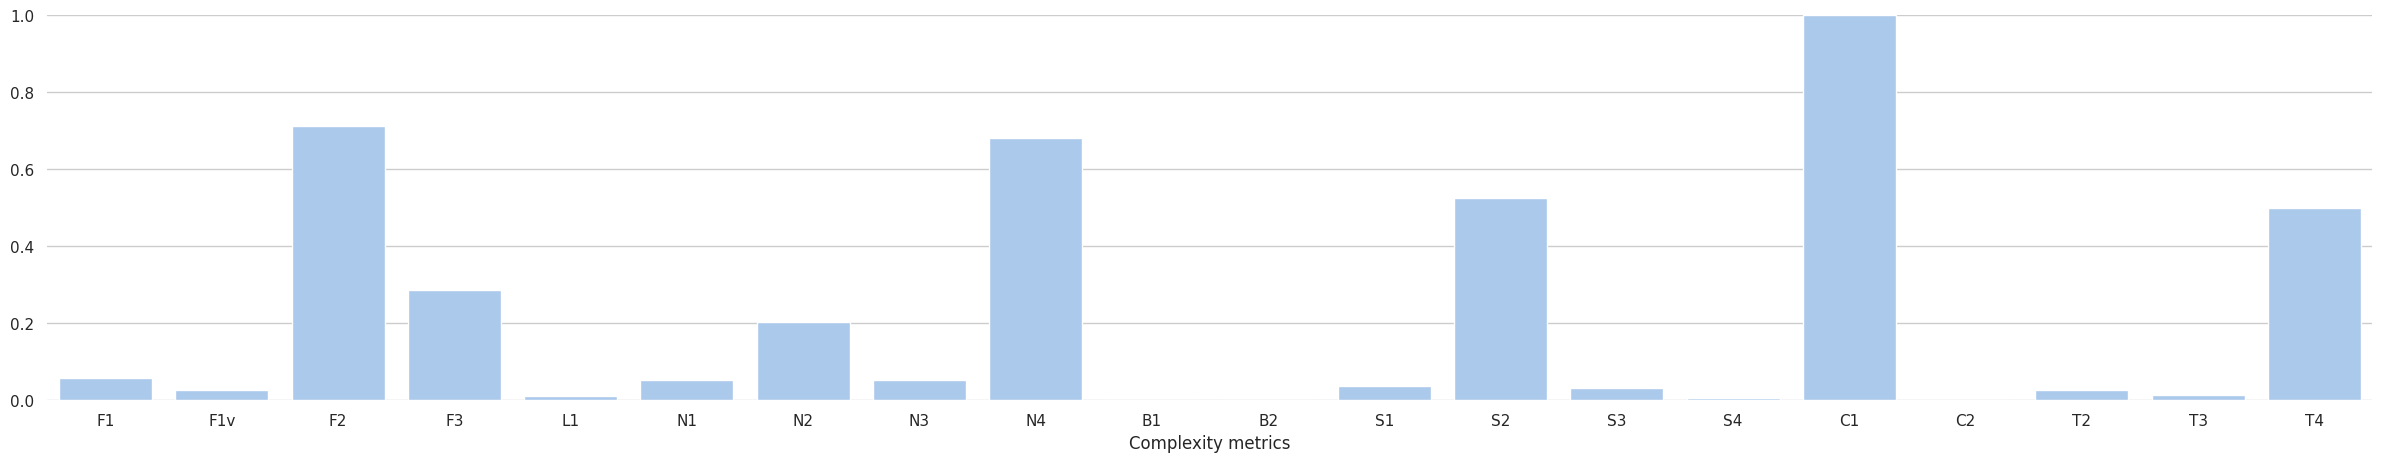

In [3]:
from dcp.utils import plot_profile

plot_profile(profile)

In [4]:
model = ComplexityProfile("features")
model.fit(X, y)

model.transform(return_type="df")

,F1,F1v,F2,F3
0,0.058628,0.0268,0.713384,0.2875


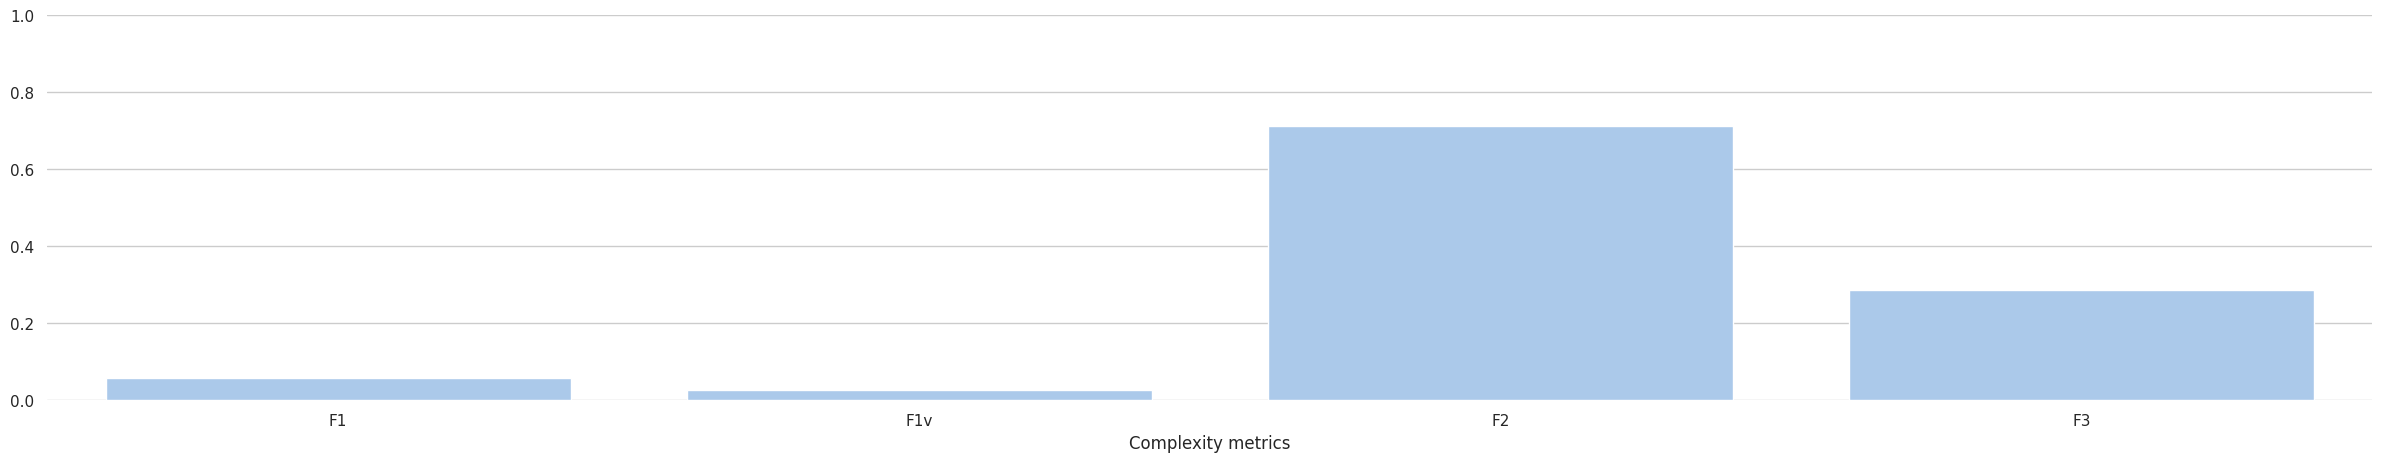

In [5]:
profile = model.transform()
plot_profile(profile)

In [6]:
model = ComplexityProfile("F1")
model.fit(X, y)

model.transform(return_type="df")

,F1
0,0.058628


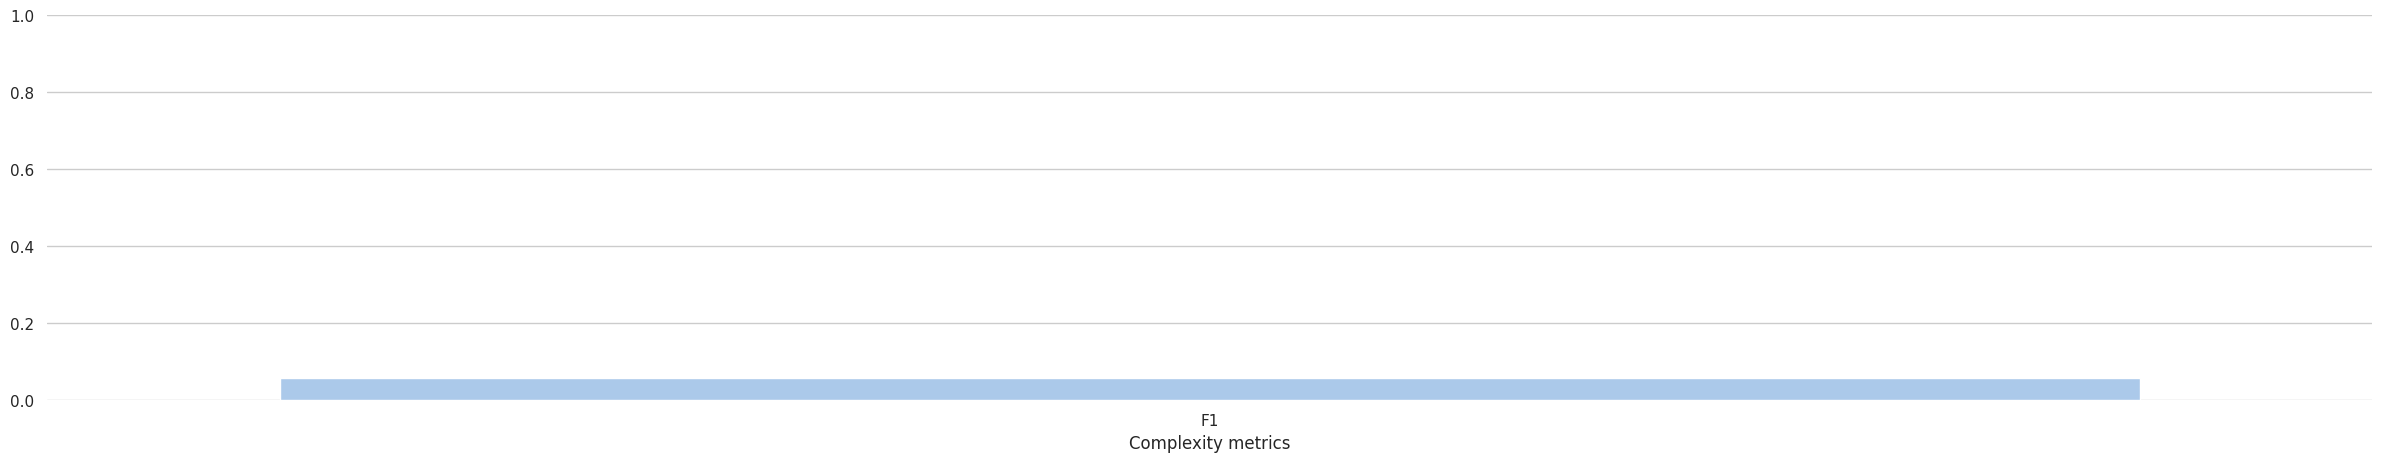

In [7]:
profile = model.transform()
plot_profile(profile)

In [8]:
model = ComplexityProfile(["B1", "B2"])
model.fit(X, y)

model.transform(return_type="df")

,B1,B2
0,2.220446e-16,0.0


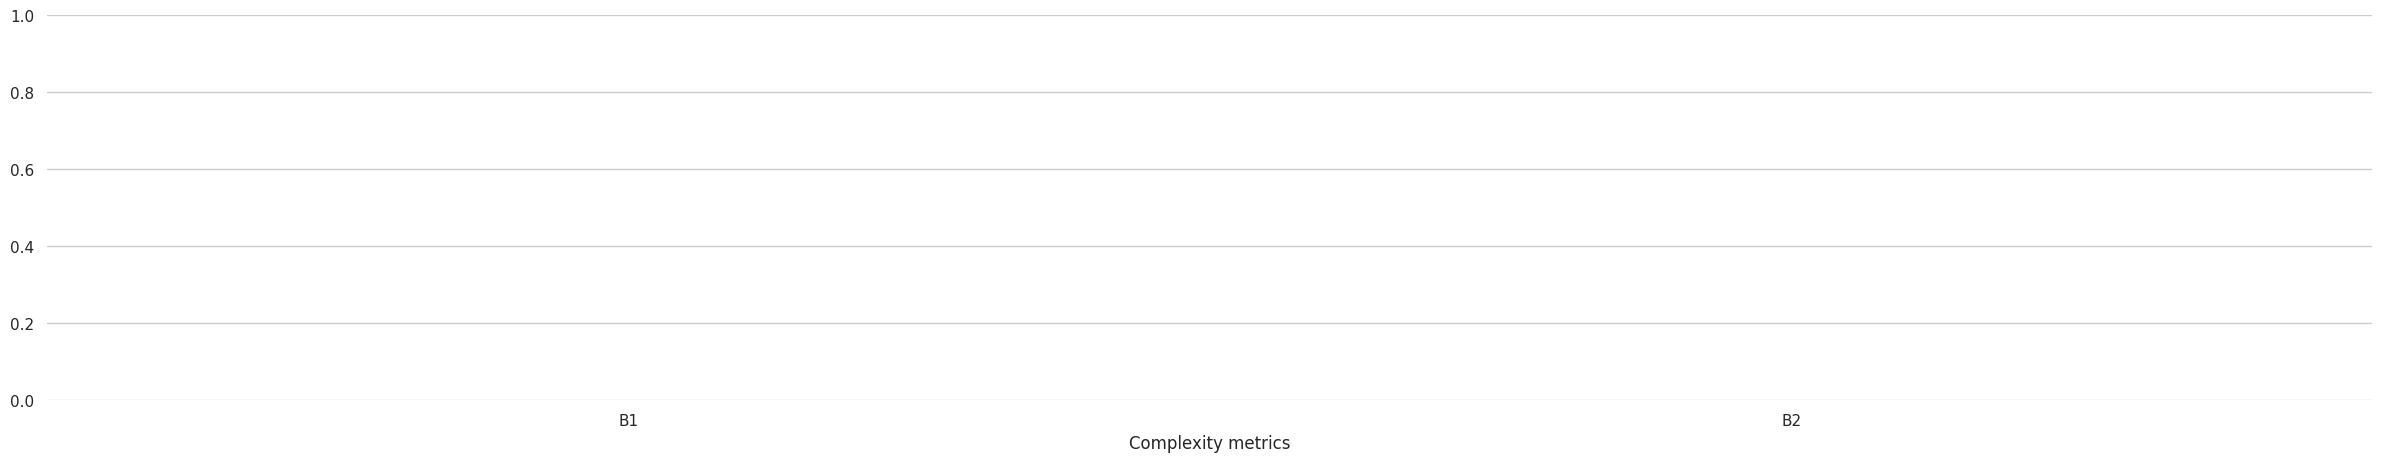

In [9]:
profile = model.transform()
plot_profile(profile)

### Breast cancer

In [10]:
from sklearn.datasets import load_breast_cancer

X, y = load_breast_cancer(return_X_y=True)

model = ComplexityProfile()
model.fit(X, y)

model.transform(return_type="df")

,F1,F1v,F2,F3,L1,N1,N2,N3,N4,B1,B2,S1,S2,S3,S4,C1,C2,T2,T3,T4
0,0.370253,0.06402,1.106883e-09,0.841359,0.032313,0.086116,0.229093,0.091388,0.490334,0.047365,0.12196,0.290675,0.844673,0.356,0.004158,0.952635,0.12196,0.052724,0.017575,0.333333


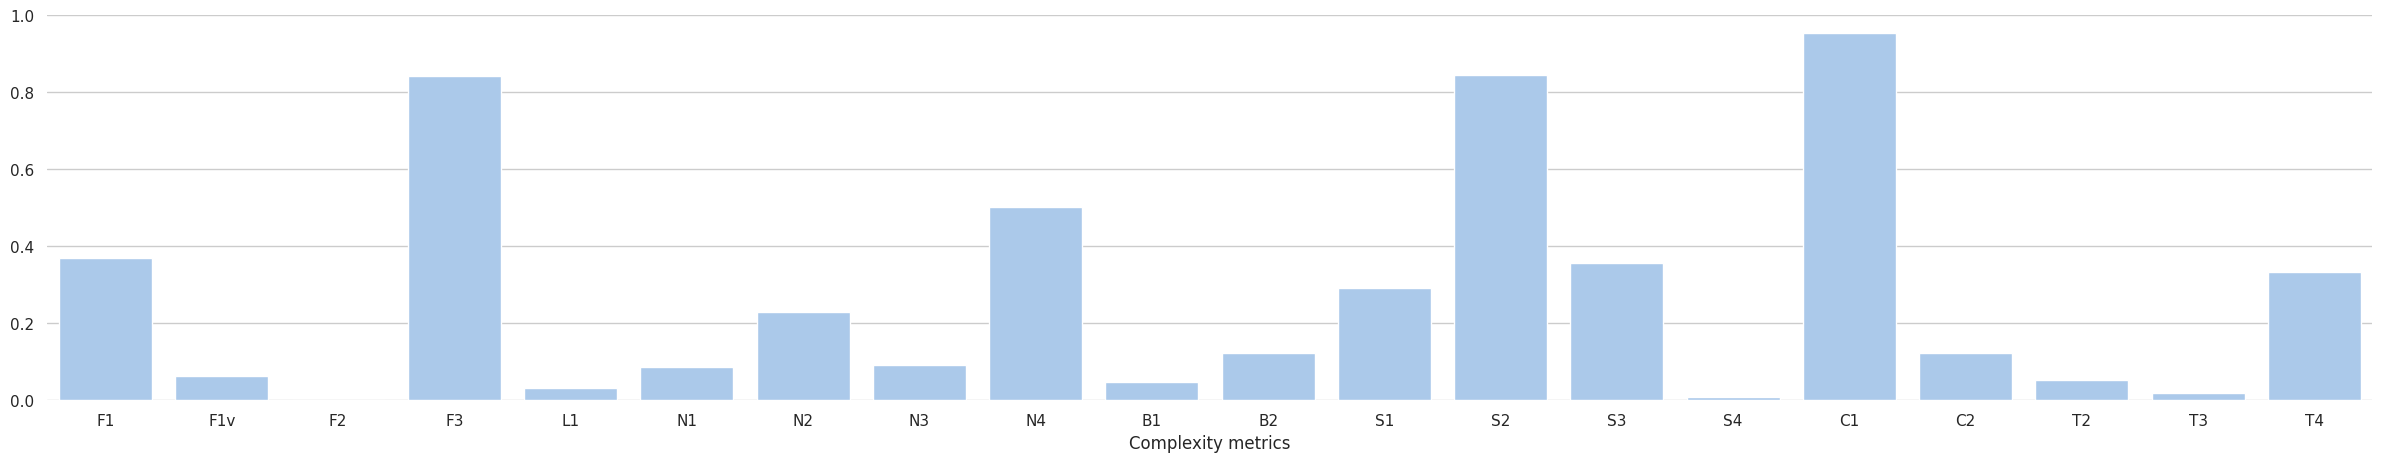

In [11]:
profile = model.transform()
plot_profile(profile)

### Wine

In [12]:
from sklearn.datasets import load_wine

X, y = load_wine(return_X_y=True)

model = ComplexityProfile()
model.fit(X, y)

model.transform(return_type="df")

,F1,F1v,F2,F3,L1,N1,N2,N3,N4,B1,B2,S1,S2,S3,S4,C1,C2,T2,T3,T4
0,0.272225,0.027275,0.001065,0.443323,0.008333,0.252809,0.323646,0.325843,0.578652,0.011445,0.018697,0.035012,0.742502,0.028078,0.00412,0.988555,0.018697,0.073034,0.05618,0.769231


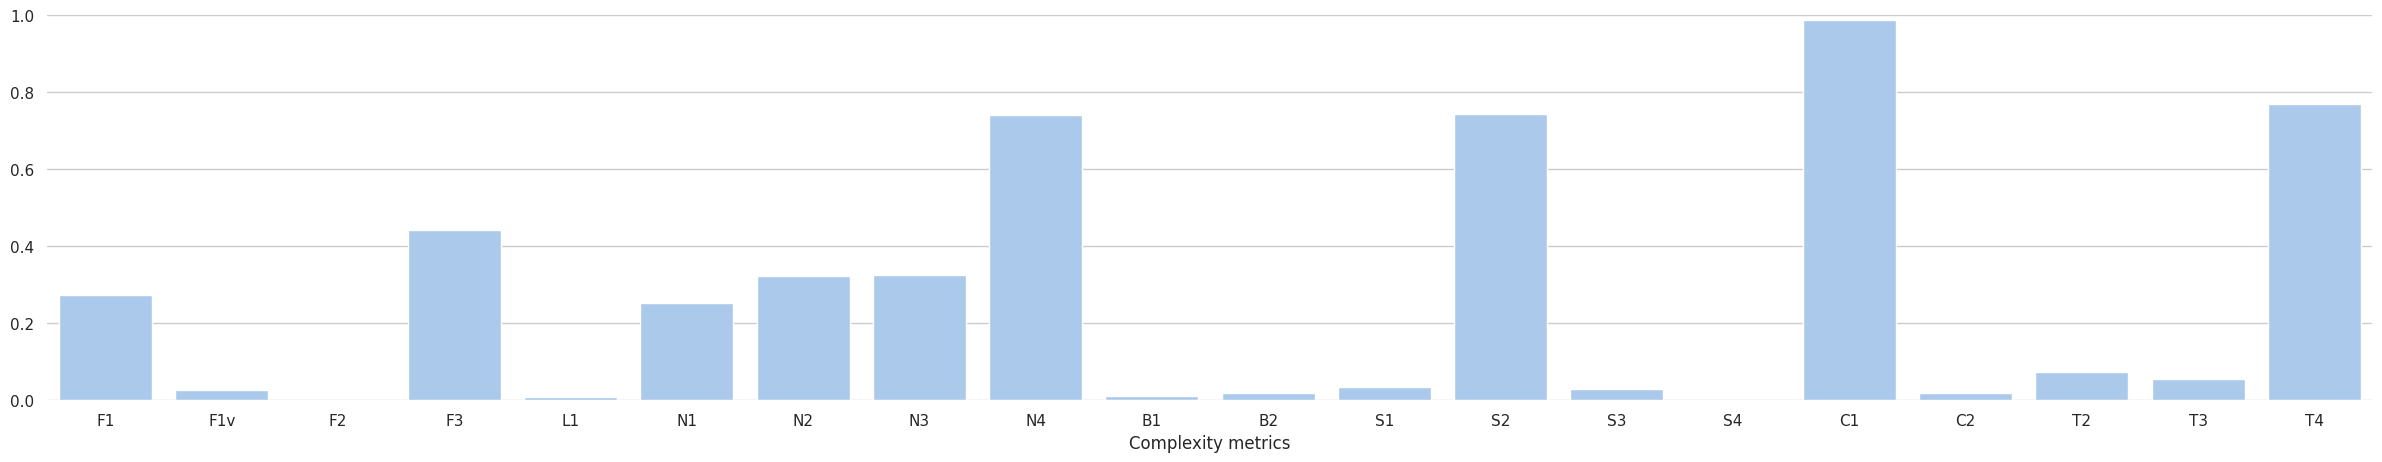

In [13]:
profile = model.transform()
plot_profile(profile)

## UCI repository

https://archive.ics.uci.edu/

In [14]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
secondary_mushroom = fetch_ucirepo(id=848)

# data (as pandas dataframes)
X = secondary_mushroom.data.features.select_dtypes("number")
y = secondary_mushroom.data.targets

# Sample data
X_samples = X.sample(frac=0.05)
y_samples = y.iloc[X_samples.index, :]
X_samples = X_samples.to_numpy()

In [15]:
X_samples.shape

(3053, 3)

In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_samples_bin = le.fit_transform(y_samples)

/home/iraitz/Documentos/Projects/data-complexity-profiler/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
model = ComplexityProfile()
model.fit(X_samples, y_samples_bin)

model.transform(return_type="df")

,F1,F1v,F2,F3,L1,N1,N2,N3,N4,B1,B2,S1,S2,S3,S4,C1,C2,T2,T3,T4
0,0.958062,0.835778,1.0,0.972814,0.293287,0.268261,0.383072,0.268588,0.502129,0.009886,0.026978,0.331452,0.582533,0.394634,0.28266,0.990114,0.026978,0.000983,0.000983,1.0


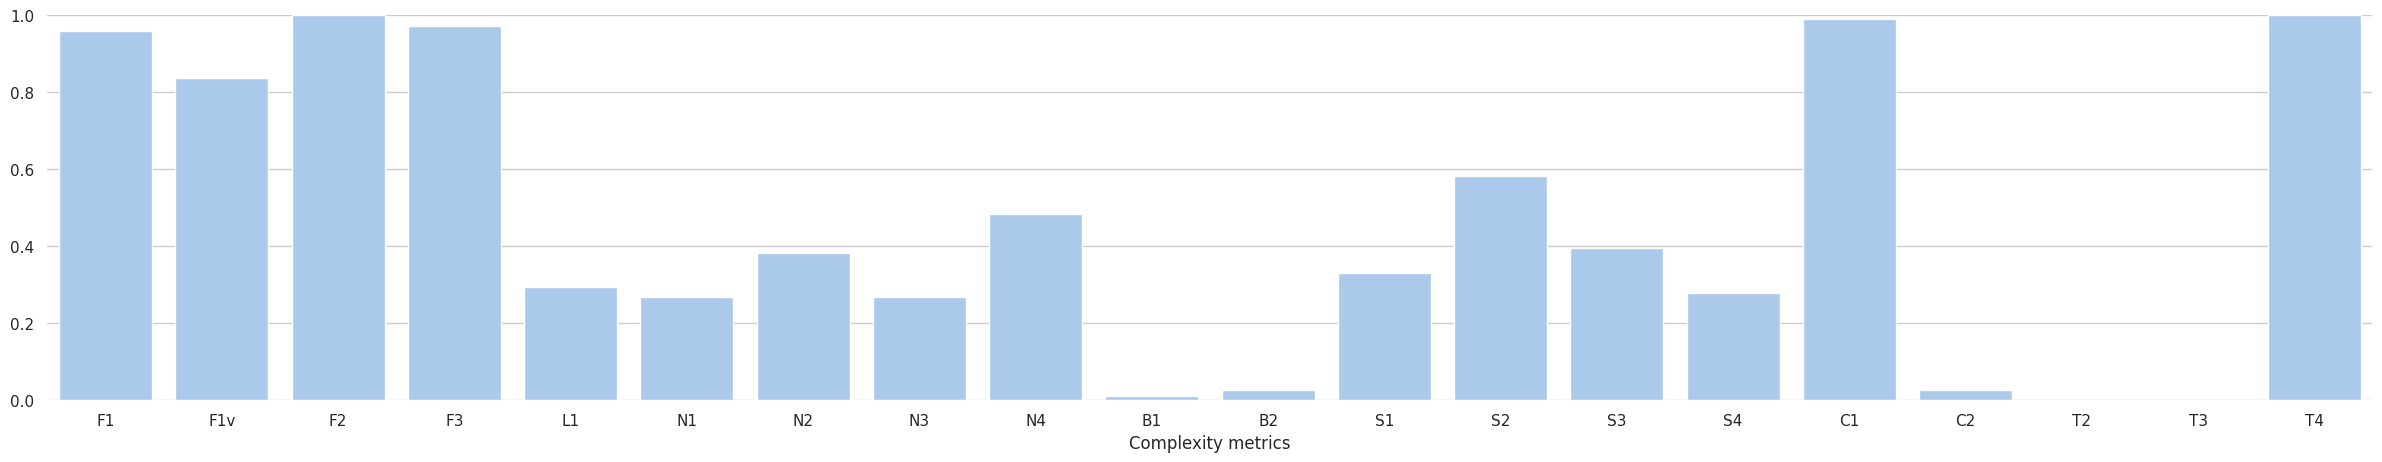

In [18]:
profile = model.transform()
plot_profile(profile)